In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv('coinbase_data_clean.csv')

In [36]:
# Need to drop timestamp to be able to convert to tensor
X=df.drop(['WP_Increase','Timestamp'],axis=1).values
y = df['WP_Increase'].values

In [43]:
X[:,0]

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.362e+03, 1.363e+03,
       1.364e+03])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Create Tensors

In [13]:
# Pytorch Libraries
import torch
import torch.nn as nn # helps create models
import torch.nn.functional as F

In [38]:
# Convert arrays to tensors for Pytorch to process
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [78]:
# Create Model
class ANN(nn.Module):
    
    def __init__(self,input_features=16,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1) # connect input to hidden layer 1
        self.f_connected2 = nn.Linear(hidden1,hidden2) # connect hidden layer 1 to hiddent layer 2
        self.out = nn.Linear(hidden2,out_features) # connect hidden 2 to output
        
    def forward(self,x): # forward propogation
            x = F.relu(self.f_connected1(x)) 
            x = F.relu(self.f_connected2(x))
            x = self.out(x)
            
            return x

### Instantialize ANN Model

In [79]:
torch.manual_seed(20)
model = ANN()

In [80]:
model.parameters

<bound method Module.parameters of ANN(
  (f_connected1): Linear(in_features=16, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

### Backpropogation

In [81]:
# Define loss function, define optimizer
loss_function = nn.CrossEntropyLoss() # useful for multiclassification problem
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [82]:
epochs=500
final_losses = []
for i in range(epochs):
    i += 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10 == 1:
        print('Epoch number:{} and the loss: {}'.format(i,loss.item()))
    
    # optimizer
    optimizer.zero_grad() # help reduce loss
    loss.backward() # backpropogate - find derivative
    optimizer.step() # performs single optimization step

Epoch number:1 and the loss: 1341637.75
Epoch number:11 and the loss: 1557.415283203125
Epoch number:21 and the loss: 76183.90625
Epoch number:31 and the loss: 41327.015625
Epoch number:41 and the loss: 33610.13671875
Epoch number:51 and the loss: 26970.359375
Epoch number:61 and the loss: 83044.7421875
Epoch number:71 and the loss: 28356.701171875
Epoch number:81 and the loss: 99426.4296875
Epoch number:91 and the loss: 42089.0390625
Epoch number:101 and the loss: 46398.640625
Epoch number:111 and the loss: 32307.82421875
Epoch number:121 and the loss: 76521.0
Epoch number:131 and the loss: 11312.3603515625
Epoch number:141 and the loss: 45241.6171875
Epoch number:151 and the loss: 67218.234375
Epoch number:161 and the loss: 38068.8984375
Epoch number:171 and the loss: 7295.52978515625
Epoch number:181 and the loss: 20495.111328125
Epoch number:191 and the loss: 24836.619140625
Epoch number:201 and the loss: 7057.51416015625
Epoch number:211 and the loss: 16038.8544921875
Epoch number

Text(0.5, 0, 'Epoch')

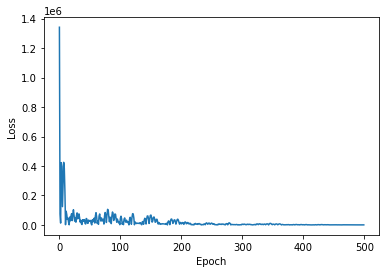

In [83]:
 # plot loss function
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Deploy model on test data

In [85]:
pred = []

with torch.no_grad():
    for i,data in enumerate(X_test):
        print(model(data))

tensor([-102.2191,  265.6334])
tensor([-1119.0280,   623.2648])
tensor([-44.7216, 278.7504])
tensor([-159.0615, -114.6510])
tensor([-111.1834,  -79.6264])
tensor([-131.3619,  -79.5176])
tensor([-113.5029,  -69.6689])
tensor([-343.9987,  437.1495])
tensor([-97.5559, -61.2306])
tensor([-1421.1285,  1135.3644])
tensor([-39.3573,   1.8208])
tensor([-233.2309,  154.7216])
tensor([-23.1581, 247.7904])
tensor([-78.9200, -55.0281])
tensor([-107.0287,  -67.9812])
tensor([-130.3684,  -93.9451])
tensor([-77.0007, -51.0757])
tensor([-168.4523, -114.9648])
tensor([-103.1330,  -61.8801])
tensor([-59.1290, -26.5430])
tensor([-1094.9508,   870.7980])
tensor([-423.7067,  878.3810])
tensor([-551.7330,  763.1554])
tensor([-60.0252, -24.9548])
tensor([-253.0075,  -71.7407])
tensor([-80.0262, -36.1859])
tensor([-702.8800,  144.4362])
tensor([-72.3256, -33.3728])
tensor([-72.8561, -46.5679])
tensor([-117.3262,  -82.5736])
tensor([-862.6735, 1213.0695])
tensor([-88.5763, -41.4744])
tensor([-156.9574,  -74.68

In [87]:
# predict classifcation - to buy or not to buy
pred2 = []

with torch.no_grad():
    for i,data in enumerate(X_test):
        pred = model(data)
        pred2.append(pred.argmax().item())
        print(pred.argmax().item()) # argmax returns index with maximum value; item returns 0 or 1

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [88]:
pred2

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [92]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

[[  0 126]
 [  0 147]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.54      1.00      0.70       147

    accuracy                           0.54       273
   macro avg       0.27      0.50      0.35       273
weighted avg       0.29      0.54      0.38       273



C:\Users\15714\anaconda3\envs\fastai_v1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
